Notes for Tomorrow:
    - Save X at *every* frame (in addition to those in animation)
    - Try sin force that also has antinode (i.e. sin(ky) instead of 1+sin(ky)
    - Try periods very close to 30 (e.g. 25 to 35) with high stiffness for Amp=60
    - Try varying amplitude (e.g. 5 at a time) close to point
    - Try varying Kp at per=30/amp=60/K=100
    

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib notebook
# def rad(a, theta): return np.sum(a*[:, np.newaxis])
dt=0.05
Nsteps = 250

t = np.linspace(0, (Nsteps-1)*dt, Nsteps)
theta = np.linspace(0, 4*np.pi, 100)

w = 2*np.pi/5

def r(n, t, wn, epsn=1.0, thetan=0.0): return epsn*np.cos(wn*t)[:, np.newaxis]*np.cos(theta*n + thetan)[np.newaxis, :]

def R(N, t, WN, EPSN=None, THETAN=None):
    EPSN = EPSN or np.ones(len(N))
    THETAN = THETAN or np.zeros(THETAN)
    return 1 + np.sum(np.array([r(N[i], t, WN[i], epsn=EPSN[i], thetan=THETAN[i]) for i in range(len(N))]), axis=0)



In [31]:
N = 9
fig = plt.figure()
axes = [fig.add_subplot(3, 3, i+1) for i in range(N)]

ims = [[] for i in range(Nsteps)]
for i in range(N):
    epsn*=0
    epsn[i]=0.5
    axes[i].set_title('n={}'.format(i))
    
    MyRad = 1 + r(i, t, w, 0.5, 0.)
    
    for j, rt in enumerate(MyRad):
        ims[j].append(axes[i].scatter(-rt*np.sin(theta), rt*np.cos(theta), color='Black'))

fig.tight_layout()
ani = animation.ArtistAnimation(fig, ims, interval=int(2000/Nsteps), repeat_delay=1)


<IPython.core.display.Javascript object>

In [32]:
Nvals = [2, 4, 2]
EPSN = [0.5, 0.3, 0.4]
WN = w*np.array([1, 1, 2])
THETA = [0, np.pi/4, 0]
fig = plt.figure()
ax = fig.add_subplot()
ims = []

RADII = R(Nvals, t, WN, EPSN, THETA)
for i, rt in enumerate(RADII):
    ims.append([ax.scatter(-rt*np.sin(theta), rt*np.cos(theta), color='Black')])
    
ani = animation.ArtistAnimation(fig, ims, interval=int(2000/Nsteps), repeat_delay=1)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


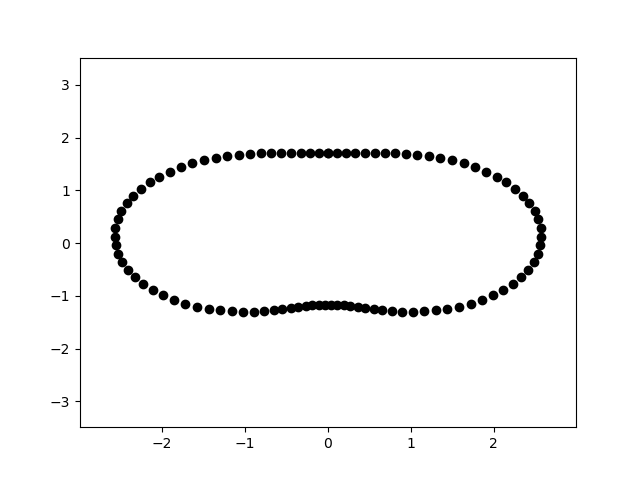

In [105]:
Nvals = [1, 2]
EPSN = [.5, .7]
WN = 2*w*np.array( [2.1, 1] )
THETA = [0, 0]
fig = plt.figure()
ax = fig.add_subplot()
ims = []

RADII = 1+R(Nvals, t, WN, EPSN, THETA)
for i, rt in enumerate(RADII):
    ims.append([ax.scatter(-rt*np.sin(theta), rt*np.cos(theta), color='Black')])
    
ani = animation.ArtistAnimation(fig, ims, interval=int(2000/Nsteps), repeat_delay=1)


# Ra = np.array(R)
print(np.shape(Ra))
Nr =  np.shape(Ra)[1]
plt.figure()
plt.title('FFT of R(t)')
# fig = plt.figure()
# ax = fig.add_subplot()
for i in range(Nr):
    plt.plot(np.linspace(0,100,len(Ra)), abs(np.fft.fft(Ra[:, i]-np.mean(Ra[:,i])))[:]**2, color = plt.get_cmap('Blues')(i/Nr))
#     plt.plot(abs(np.fft.fft(Ra[:, i] - np.mean(Ra[:,i])))[:]**2)
#     plt.plot(Ra[:, i], color = plt.get_cmap('Blues')(i/Nr))    

In [39]:
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
ims = []

R = r(theta, t)
for i, rt in enumerate(R):
    im = ax.plot(rt, color='Black')
    im.extend(ax2.plot(np.linspace(0, 2*np.pi, len(rt)), abs(np.fft.fft(rt))[:]**2, color='Black'))
    ims.append(im)
    
ani = animation.ArtistAnimation(fig, ims, interval=int(2000/Nsteps), repeat_delay=1)


<IPython.core.display.Javascript object>

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib notebook
# def rad(a, theta): return np.sum(a*[:, np.newaxis])
theta = np.linspace(0, 4*np.pi, 100)
N = 10
w = 12*(2*np.pi)
global t
t=0.
dt=0.0005

epsn = np.zeros(N)
epsn[0]=1.
wn = w*np.ones(N)
thetan = np.zeros(N)


def a(n, t): return epsn[n]*np.cos(wn[n]*t)


# def r(theta): return np.sum([1 + a(n, t)*np.cos(theta*n + thetan[n]) for n in range(N)], axis=0)
def r(theta): return 1+np.sum([a(n, t)*np.cos(theta*n + thetan[n]) for n in range(N)], axis=0)


fig = plt.figure()
ax = fig.add_subplot()
DAT = []

scat = ax.scatter(np.cos(theta), np.sin(theta))
for i in range(12):
    rt = r(theta)
    t += dt
    DAT.append(np.vstack([rt*np.cos(theta), rt*np.sin(theta)]))
#     plt.scatter(rt*np.cos(theta), rt*np.sin(theta))
    
    
def func(i): 
    scat.set_offsets(DAT[i].transpose())
#     ax.scatter(*DAT[i])
    ax.figure.canvas.draw()
# def func(dat):  
#     scat.set_data(*dat)
#     ax.figure.canvas.draw()
    
ani = animation.FuncAnimation(fig, func, frames=np.arange(12), repeat=True)

<IPython.core.display.Javascript object>